<a href="https://colab.research.google.com/github/Lhn91/SPE_HK251_assignment_Multiple-queuing-system/blob/main/HK151_SPE_Iron_Sentinel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# **Báo cáo: Đánh giá Hiệu năng Hệ thống Nhà hàng Buffet Tự phục vụ sử dụng Mô phỏng Sự kiện Rời rạc**

</center>




In [2]:
from IPython.display import HTML, display
html_code = r'''
<!-- draw.io diagram -->
<div class="mxgraph" style="max-width:100%;border:1px solid transparent;" data-mxgraph="{&quot;highlight&quot;:&quot;#0000ff&quot;,&quot;nav&quot;:true,&quot;resize&quot;:true,&quot;page&quot;:0,&quot;dark-mode&quot;:&quot;auto&quot;,&quot;toolbar&quot;:&quot;pages zoom layers tags lightbox&quot;,&quot;edit&quot;:&quot;_blank&quot;,&quot;url&quot;:&quot;https://drive.google.com/uc?id=1qlyGaY8SY-5aoYictmzoFBupr6aHffHm&amp;export=download&quot;}"></div>
<script type="text/javascript" src="https://viewer.diagrams.net/embed2.js?&fetch=https%3A%2F%2Fdrive.google.com%2Fuc%3Fid%3D1qlyGaY8SY-5aoYictmzoFBupr6aHffHm%26export%3Ddownload"></script>

'''

display(HTML(html_code))

# 1. Team work declaration

## Team
| Student                 | ID      |
|-------------------------|---------|
| CAO VĨNH PHÁT           | 2212497 |
| LÊ HẢI NGUYÊN           | 2212294 |
| NGUYỄN MINH QUÝ         | 2212868 |
| NGUYỄN QUANG NGHIÊM     | 2212209 |
| NGÔ QUANG TÙNG          | 2213869 |
| NGUYỄN NGỌC SONG THỦY   | 2213381 |
| NGUYỄN PHƯƠNG NGUYÊN    | 2212311 |
| THÁI ANH KHƯƠNG         | 2113806 |


## Workmap declaration

| Last name | Student ID | Design Role | Dev Role | Eval Role | Report Role | Ass1 work description (details in text)  | Rating | week 2 outcome | week 3 outcome | week 4 outcome  |
|-----------|------------|-------------|----------|-----------|-------------|------------------------------------------|-----------------|----------------|----------------|-----------------|
| S1        |            | yes/no      | yes/no   | yes/no    | yes/no      |                                          | A/B/C           |                |                |                 |
| S2        |            | yes/no      | yes/no   | yes/no    | yes/no      |                                          | A/B/C           |                |                |                 |
| S3        |            | yes/no      | yes/no   | yes/no    | yes/no      |                                          | A/B/C           |                |                |                 |
| S4        |            | yes/no      | yes/no   | yes/no    | yes/no      |                                          | A/B/C           |                |                |                 |
| S5        |            | yes/no      | yes/no   | yes/no    | yes/no      |                                          | A/B/C           |                |                |                 |
| S6        |            | yes/no      | yes/no   | yes/no    | yes/no      |                                          | A/B/C           |                |                |                 |
|           |            |             |          |           |             |                                          |                 |                |                |                 |
|           |            |             |          |           |             |                                          |                 |                |                |                 |


# 2. Thiết kế Hệ thống (System Design)

## 2.1. Xác định Mục tiêu và Hệ thống (Define Goal and System)
* **Định nghĩa Hệ thống:** Một mạng lưới nhà hàng buffet tự phục vụ bao gồm 2 lối vào (Entrances) và 3 quầy thức ăn (Grill, Beverage, Dessert). Hệ thống hoạt động như một mạng hàng đợi (Queueing Network) nơi khách hàng di chuyển giữa các trạm dựa trên ma trận xác suất định tuyến.
* **Mục tiêu:**
    1.  **Dự đoán Hiệu năng:** Ước tính thời gian đáp ứng ($E[R]$), thông lượng ($X$), và chiều dài hàng đợi dưới các mức tải khác nhau.
    2.  **Phân tích Độ ổn định:** Đánh giá hành vi hệ thống trong điều kiện quá tải (stress test) và tác động của sự mất kiên nhẫn từ khách hàng (reneging).
    3.  **Kiểm chứng (Verification):** So sánh kết quả mô phỏng với mô hình giải tích toán học (M/M/c/K) để đảm bảo độ chính xác.

## 2.2. Dịch vụ và Kết quả (Service and Outcomes)
* **Dịch vụ:**
    * **Lối vào (Entrance):** Kiểm soát vé và tiếp nhận khách vào khu vực buffet.
    * **Các quầy (Stations):** Phục vụ các loại thức ăn cụ thể (Món nướng, Đồ uống, Tráng miệng).
* **Các kết quả có thể xảy ra (Outcomes):**
    * **Served (Được phục vụ):** Khách hàng hoàn thành dịch vụ tại một trạm thành công.
    * **Blocked (Bị chặn):** Khách đến nhưng hệ thống hoặc hàng đợi đã đầy (Finite Capacity).
    * **Reneged (Bỏ hàng):** Khách xếp hàng nhưng rời đi trước khi được phục vụ do hết kiên nhẫn (Impatience).

## 2.3. Chọn Đánh giá (Select Metrics)
Nhóm tập trung vào các chỉ số hiệu năng chính sau:
* **$E[R]$ (Mean Response Time):** Tổng thời gian trung bình khách ở trong hệ thống (LB - Càng thấp càng tốt).
* **$X$ (Throughput):** Tốc độ khách hàng hoàn thành và rời khỏi hệ thống (HB - Càng cao càng tốt).
* **$U$ (Utilization):** Tỷ lệ thời gian nhân viên bận rộn (HB/Nominal).
* **$E[N]$ (Mean Number in System):** Số lượng khách trung bình đang có mặt trong nhà hàng.
* **$P_{reject}$ (Blocking Probability):** Xác suất một khách mới bị từ chối phục vụ do hết chỗ.
* **Reneging Rate:** Tỷ lệ khách hàng bỏ hàng do chờ quá lâu.

## 2.4. Liệt kê Tham số Hệ thống (List System Parameters)
Đây là các đặc tính cố định của cấu hình hệ thống (Fixed Input):
* **Tốc độ phục vụ ($\mu$):** Tốc độ phục vụ theo phân phối mũ cho Lối vào ($\mu_E$), Quầy nướng ($\mu_A$), Đồ uống ($\mu_B$), và Tráng miệng ($\mu_C$).
* **Số lượng Server ($c$):** Số nhân viên tại mỗi quầy (ví dụ: $c=3$ cho các quầy thức ăn).
* **Dung lượng hàng đợi ($K$):** Số người tối đa được phép xếp hàng tại mỗi trạm (ví dụ: $K=10$).
* **Sức chứa hệ thống:** Tổng số khách tối đa cho phép trong nhà hàng (ví dụ: 200).
* **Ma trận định tuyến ($P_{ij}$):** Xác suất chuyển từ trạm $i$ sang trạm $j$ hoặc rời đi ($P_{exit}$).

## 2.5. Liệt kê các Yếu tố Nghiên cứu (List Factors to Study)
Đây là các biến số cnhóm nghiên cứu thay đổi qua các kịch bản thực nghiệm:
* **Cường độ tải ($\lambda$):**
    * *Tải cơ sở (Base Load):* Điều kiện lưu lượng bình thường.
    * *Tải cực đại (Stress Load):* Lưu lượng cao gấp $2.2$ lần tải cơ sở để kiểm tra độ ổn định.
* **Hành vi khách hàng (Reneging):**
    * *Kiên nhẫn:* Khách chờ vô điều kiện (Mô hình chuẩn M/M/c/K).
    * *Mất kiên nhẫn:* Khách rời đi nếu thời gian chờ vượt quá ngưỡng chịu đựng (Stress Test).
* **Giai đoạn khởi động (Warmup):** Các chiến lược loại bỏ dữ liệu quá độ (Transient removal) khác nhau.

## 2.6. Kỹ thuật Đánh giá (Evaluation Technique)
* **Mô phỏng sự kiện rời rạc (DES):** Sử dụng thư viện `SimPy` (tiếp cận theo hướng Process-oriented) để mô hình hóa các tương tác phức tạp và logic bỏ hàng.
* **Mô hình hóa Giải tích:** Sử dụng công thức lý thuyết hàng đợi M/M/c/K và Phương trình lưu lượng để kiểm chứng (verify) kịch bản cơ sở.
* **Phân tích Thống kê:**
    * **Phương pháp Welch:** Để xác định và loại bỏ giai đoạn quá độ (transient removal).
    * **Lặp lại độc lập (Independent Replications):** Để tính khoảng tin cậy (Student-t, 95%) cho các kết quả mô phỏng.

## 2.7. Chọn Tải (Select Workload)
Chúng tôi định nghĩa ba kịch bản tải thực nghiệm riêng biệt:
1.  **Thực nghiệm A (WL-BASE):** Dòng đến Poisson hằng số ($\lambda_{base}$), Không bỏ hàng. Dùng để kiểm chứng mô hình so với Lý thuyết giải tích.
2.  **Thực nghiệm B (WL-STRESS):** Tốc độ đến cao ($\lambda_{stress} = 2.2 \times \lambda_{base}$), Bật tính năng bỏ hàng (Reneging). Dùng để nghiên cứu hành vi hệ thống khi quá tải.
3.  **Thực nghiệm C (WL-RAMP):** Tốc độ đến thay đổi theo thời gian (tăng đột biến lúc đầu) để phân tích hành vi quá độ và hiệu quả của việc cắt bỏ giai đoạn khởi động (warmup truncation).



## System Component/Module description

# 3. System Implementation



# **0. Install prerequisite library**


*   simpy



In [3]:
pip install simpy

# **1. Nhập thư viện & thiết lập chung**

In [4]:
from __future__ import annotations
import copy
import csv
import math
import os
import random
import shutil
from dataclasses import dataclass
from pathlib import Path
from typing import Callable, Dict, List, Optional, Sequence, Tuple

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np
import simpy

try:
    from scipy.stats import t as student_t_dist
except Exception:  # pragma: no cover - SciPy might be missing on some setups
    student_t_dist = None

# **2. Kiểu dữ liệu & hằng số toàn cục**

In [5]:
PatienceSampler = Callable[[random.Random, str], float]
MetricDict = Dict[str, float]
STATION_NAMES = ["Grill", "Beverage", "Dessert"]
SINK_NAME = "SINK"
SYSTEM_CSV_PATH = "buffet_system_replications.csv"
QUEUE_CSV_PATH = "buffet_queue_replications.csv"
TRANSITION_CSV_PATH = "buffet_transition_replications.csv"
SYSTEM_CSV_DIR = "system_workloads"
QUEUE_CSV_DIR = "queue_workloads"
TRANSITION_CSV_DIR = "transition_workloads"
WELCH_OUTPUT_DIR = "welch_plots"
ANIMATION_DIR = "animations"


def sanitize_name(name: str) -> str:
    safe = "".join(ch if ch.isalnum() or ch in ("-", "_") else "_" for ch in name)
    return safe or "workload"
def ensure_parent_dir(file_path: str) -> None:
    Path(file_path).parent.mkdir(parents=True, exist_ok=True)


def append_csv_row(file_path: str, fieldnames: List[str], row: Dict[str, float]) -> None:
    ensure_parent_dir(file_path)
    file_exists = Path(file_path).is_file()
    with open(file_path, "a", newline="", encoding="utf-8") as handle:
        writer = csv.DictWriter(handle, fieldnames=fieldnames)
        if not file_exists:
            writer.writeheader()
        writer.writerow(row)


def queue_spec_from_config(queue_name: str, config: Dict) -> Dict[str, float]:
    if queue_name.startswith("Entrance"):
        return {"servers": config["C_E"], "buffer": config["B_E"], "mu": config["MU_E"]}
    mapping = {
        "Grill": ("C_A", "B_FOOD", "MU_A"),
        "Beverage": ("C_B", "B_FOOD", "MU_B"),
        "Dessert": ("C_C", "B_FOOD", "MU_C"),
    }
    c_key, b_key, mu_key = mapping.get(queue_name, ("C_A", "B_FOOD", "MU_A"))
    return {"servers": config[c_key], "buffer": config[b_key], "mu": config[mu_key]}


def student_t_critical(df: int, confidence: float = 0.95) -> float:
    """Return the two-sided critical value for Student's t distribution."""
    alpha = 1.0 - confidence
    if df <= 0:
        return float("nan")
    if student_t_dist is not None:
        return float(student_t_dist.ppf(1.0 - alpha / 2.0, df))
    # Fallback approximation (Jain, Ch. 12 suggestion using Wilson-Hilferty)
    # Works well for df >= 5.
    z = 1.0 - alpha / 2.0
    # inverse error function approximation
    def inv_norm(p: float) -> float:
        # Abramowitz-Stegun approximation
        a1 = -39.6968302866538
        a2 = 220.946098424521
        a3 = -275.928510446969
        a4 = 138.357751867269
        a5 = -30.6647980661472
        a6 = 2.50662827745924

        b1 = -54.4760987982241
        b2 = 161.585836858041
        b3 = -155.698979859887
        b4 = 66.8013118877197
        b5 = -13.2806815528857

        c1 = -0.00778489400243029
        c2 = -0.322396458041136
        c3 = -2.40075827716184
        c4 = -2.54973253934373
        c5 = 4.37466414146497
        c6 = 2.93816398269878

        d1 = 0.00778469570904146
        d2 = 0.32246712907004
        d3 = 2.44513413714299
        d4 = 3.75440866190742

        plow = 0.02425
        phigh = 1 - plow

        if p < plow:
            q = math.sqrt(-2 * math.log(p))
            return (((((c1 * q + c2) * q + c3) * q + c4) * q + c5) * q + c6) / (
                (((d1 * q + d2) * q + d3) * q + d4)
            )
        if phigh < p:
            q = math.sqrt(-2 * math.log(1 - p))
            return -(((((c1 * q + c2) * q + c3) * q + c4) * q + c5) * q + c6) / (
                (((d1 * q + d2) * q + d3) * q + d4)
            )
        q = p - 0.5
        r = q * q
        return (((((a1 * r + a2) * r + a3) * r + a4) * r + a5) * r + a6) * q / (
            ((((b1 * r + b2) * r + b3) * r + b4) * r + b5) * r + 1
        )

    z_score = inv_norm(z)
    return float(z_score + (z_score**3 + z_score) / (4 * df))

# **3. Thành phần cốt lõi của mô phỏng (khách, hàng đợi, hệ thống)**

In [6]:
@dataclass
class Customer:
    """Represents a diner traversing the buffet network."""

    name: str
    arrival_time_system: float
    alpha_vector: Sequence[float]
    r_matrix: np.ndarray
    p_exit: float
    routing_rng: np.random.Generator
    finish_time_system: float = 0.0
    current_station_name: str = ""

    def log_entry(self, station_name: str, time_in: float, wait_time: float, service_time: float) -> None:
        pass  # Kept minimal; history logging not needed for version2 reporting.

    def get_total_response_time(self) -> float:
        return self.finish_time_system - self.arrival_time_system if self.finish_time_system else 0.0

    def make_initial_decision(self) -> str:
        self.current_station_name = self.routing_rng.choice(STATION_NAMES, p=self.alpha_vector)
        return self.current_station_name

    def make_next_decision(self) -> str:
        if self.routing_rng.random() < self.p_exit:
            self.current_station_name = SINK_NAME
            return SINK_NAME

        idx = STATION_NAMES.index(self.current_station_name)
        vector = self.r_matrix[idx]
        total = np.sum(vector)
        if total <= 0:
            self.current_station_name = SINK_NAME
            return SINK_NAME
        probs = vector / total
        self.current_station_name = self.routing_rng.choice(STATION_NAMES, p=probs)
        return self.current_station_name


class BuffetQueue:
    """Single M/M/c/K node with optional reneging."""

    def __init__(
        self,
        env: simpy.Environment,
        name: str,
        num_servers: int,
        service_rate: float,
        buffer_size: float,
        rng_service: Optional[random.Random] = None,
        allow_reneging: bool = False,
        patience_sampler: Optional[PatienceSampler] = None,
        patience_rng: Optional[random.Random] = None,
    ):
        self.env = env
        self.name = name
        self.num_servers = num_servers
        self.service_rate = service_rate
        self.buffer_size = buffer_size
        self.server = simpy.Resource(env, capacity=num_servers)
        self.rng_service = rng_service or random.Random()
        self.allow_reneging = allow_reneging
        self.patience_sampler = patience_sampler
        self.patience_rng = patience_rng or random.Random()
        self.queue_len = 0
        self.stats: Dict[str, float] = {
            "served": 0,
            "rejected": 0,
            "reneged": 0,
            "total_wait_time": 0.0,
            "total_system_time": 0.0,
            "arrivals": 0,
        }

    def _draw_patience(self) -> float:
        if not self.patience_sampler:
            return float("inf")
        patience = max(0.0, float(self.patience_sampler(self.patience_rng, self.name)))
        return patience

    def service_process(self, customer: Customer) -> str:
        self.stats["arrivals"] += 1
        arrival_time = self.env.now

        if self.queue_len >= self.buffer_size:
            self.stats["rejected"] += 1
            return "blocked"

        self.queue_len += 1

        req = self.server.request()
        got_server = False
        try:
            if self.allow_reneging and self.patience_sampler:
                patience = self._draw_patience()
                patience_evt = self.env.timeout(patience)
                result = yield req | patience_evt
                if req in result.events:
                    got_server = True
                else:
                    self.stats["reneged"] += 1
                    self.queue_len -= 1
                    if not req.triggered:
                        try:
                            req.cancel()
                        except ValueError:
                            pass
                    return "reneged"
            else:
                yield req
                got_server = True

            self.queue_len -= 1

            wait_time = self.env.now - arrival_time
            self.stats["total_wait_time"] += wait_time

            service_time = self.rng_service.expovariate(self.service_rate)
            yield self.env.timeout(service_time)

            system_time = self.env.now - arrival_time
            self.stats["served"] += 1
            self.stats["total_system_time"] += system_time

            return "served"
        finally:
            if got_server:
                self.server.release(req)
            elif not req.triggered:
                try:
                    req.cancel()
                except ValueError:
                    pass


class BuffetSimulation:
    """Wraps one replication of the buffet system."""

    def __init__(self, env: simpy.Environment, config: Dict):
        self.env = env
        self.config = config
        self.warmup = config.get("WARMUP_DURATION", 0.0)
        self.sampling_interval = config.get("SAMPLING_INTERVAL", 1.0)
        self.allow_reneging = config.get("ALLOW_RENEGING", False)
        self.patience_dist = config.get("PATIENCE_DIST")

        self.seeds = config.get("SEEDS", {})
        self.arrival_rng = random.Random(self.seeds.get("arrival"))
        self.routing_rng = np.random.default_rng(self.seeds.get("routing"))
        self.selection_rng = random.Random(self.seeds.get("selection"))
        patience_seed = self.seeds.get("patience")
        self.patience_rngs = {
            name: random.Random(None if patience_seed is None else patience_seed + idx)
            for idx, name in enumerate(["Entrance 1", "Entrance 2", *STATION_NAMES])
        }

        self.service_rngs = {}
        service_base = self.seeds.get("service_base")
        for idx, name in enumerate(["Entrance 1", "Entrance 2", *STATION_NAMES]):
            self.service_rngs[name] = random.Random(None if service_base is None else service_base + idx)

        self.e1 = BuffetQueue(
            env,
            "Entrance 1",
            config["C_E"],
            config["MU_E"],
            config["B_E"],
            rng_service=self.service_rngs["Entrance 1"],
            allow_reneging=self.allow_reneging,
            patience_sampler=self.patience_dist,
            patience_rng=self.patience_rngs["Entrance 1"],
        )
        self.e2 = BuffetQueue(
            env,
            "Entrance 2",
            config["C_E"],
            config["MU_E"],
            config["B_E"],
            rng_service=self.service_rngs["Entrance 2"],
            allow_reneging=self.allow_reneging,
            patience_sampler=self.patience_dist,
            patience_rng=self.patience_rngs["Entrance 2"],
        )

        self.grill = BuffetQueue(
            env,
            "Grill",
            config["C_A"],
            config["MU_A"],
            config["B_FOOD"],
            rng_service=self.service_rngs["Grill"],
            allow_reneging=self.allow_reneging,
            patience_sampler=self.patience_dist,
            patience_rng=self.patience_rngs["Grill"],
        )
        self.beverage = BuffetQueue(
            env,
            "Beverage",
            config["C_B"],
            config["MU_B"],
            config["B_FOOD"],
            rng_service=self.service_rngs["Beverage"],
            allow_reneging=self.allow_reneging,
            patience_sampler=self.patience_dist,
            patience_rng=self.patience_rngs["Beverage"],
        )
        self.dessert = BuffetQueue(
            env,
            "Dessert",
            config["C_C"],
            config["MU_C"],
            config["B_FOOD"],
            rng_service=self.service_rngs["Dessert"],
            allow_reneging=self.allow_reneging,
            patience_sampler=self.patience_dist,
            patience_rng=self.patience_rngs["Dessert"],
        )

        self.food_queues = {"Grill": self.grill, "Beverage": self.beverage, "Dessert": self.dessert}
        self.all_queues = [self.e1, self.e2, self.grill, self.beverage, self.dessert]

        self.stats: Dict[str, float] = {
            "total_rejected_system": 0,
            "total_customers_in": 0,
            "total_customers_out": 0,
            "total_reneged": 0,
        }
        self.completed_customers: List[Customer] = []

        self.time_series = {"time": [], "n_system": []}
        self.station_names = ["Entrance 1", "Entrance 2", *STATION_NAMES]
        self.animation_data: Dict[str, List[float]] = {"time": []}
        for name in self.station_names:
            self.animation_data[name] = []
        self.transition_counts = {
            source: {target: 0 for target in [*STATION_NAMES, SINK_NAME]}
            for source in STATION_NAMES
        }

    # ------------------------------------------------------------------
    # Processes
    # ------------------------------------------------------------------
    def monitor_system(self):
        """Sample N(t) for Welch's method."""
        try:
            while True:
                total = sum(q.queue_len + q.server.count for q in self.all_queues)
                self.time_series["time"].append(self.env.now)
                self.time_series["n_system"].append(total)
                self.animation_data["time"].append(self.env.now)
                for queue in [self.e1, self.e2, *self.food_queues.values()]:
                    total_in_station = queue.queue_len + queue.server.count
                    self.animation_data[queue.name].append(total_in_station)
                yield self.env.timeout(self.sampling_interval)
        except simpy.Interrupt:
            return

    def record_transition(self, source: str, destination: str) -> None:
        """Track realized routing choices for later validation."""
        if source not in self.transition_counts:
            return
        if destination not in self.transition_counts[source]:
            self.transition_counts[source][destination] = 0
        self.transition_counts[source][destination] += 1

    def customer_lifecycle(self, customer: Customer):
        try:
            entrance = self.selection_rng.choice([self.e1, self.e2])
            entrance_status = yield self.env.process(entrance.service_process(customer))
            if entrance_status != "served":
                if entrance_status == "reneged":
                    self.stats["total_reneged"] += 1
                customer.finish_time_system = self.env.now
                self.stats["total_customers_out"] += 1
                self.completed_customers.append(customer)
                return

            current_station = customer.make_initial_decision()
            while current_station != SINK_NAME:
                queue = self.food_queues[current_station]
                status = yield self.env.process(queue.service_process(customer))
                if status != "served":
                    if status == "reneged":
                        self.stats["total_reneged"] += 1
                    break
                next_station = customer.make_next_decision()
                self.record_transition(current_station, next_station)
                current_station = next_station

            customer.finish_time_system = self.env.now
            self.stats["total_customers_out"] += 1
            self.completed_customers.append(customer)
        except simpy.Interrupt:
            return

    def customer_source(self):
        lam_func = self.config["LAMDA_FUNC"]
        cust_id = 0
        try:
            while True:
                lam_now = lam_func(self.env.now)
                if lam_now <= 0:
                    yield self.env.timeout(1.0)
                    continue
                inter = self.arrival_rng.expovariate(lam_now)
                yield self.env.timeout(inter)

                in_system = self.stats["total_customers_in"] - self.stats["total_customers_out"]
                if in_system >= self.config["SYSTEM_CAPACITY_MAX"]:
                    self.stats["total_rejected_system"] += 1
                    continue

                cust_id += 1
                self.stats["total_customers_in"] += 1
                cust = Customer(
                    name=f"Cust_{cust_id}",
                    arrival_time_system=self.env.now,
                    alpha_vector=self.config["ALPHA"],
                    r_matrix=self.config["R_MATRIX"],
                    p_exit=self.config["P_EXIT"],
                    routing_rng=self.routing_rng,
                )
                self.env.process(self.customer_lifecycle(cust))
        except simpy.Interrupt:
            return

    # ------------------------------------------------------------------
    # Execution helpers
    # ------------------------------------------------------------------
    def run(self):
        self.source_proc = self.env.process(self.customer_source())
        self.monitor_proc = self.env.process(self.monitor_system())
        self.env.run(until=self.config["SIM_DURATION_MINS"])
        for proc in (self.source_proc, self.monitor_proc):
            if proc and not proc.triggered:
                proc.interrupt()

        while self.env._queue:
            self.env.step()

    def calculate_results(self) -> Dict[str, float]:
        finished = [
            cust for cust in self.completed_customers if cust.finish_time_system > 0 and cust.arrival_time_system >= self.warmup
        ]
        if not finished:
            return {}

        response_times = [cust.get_total_response_time() for cust in finished]
        e_r = float(np.mean(response_times))
        std_r = float(np.std(response_times, ddof=1)) if len(response_times) > 1 else 0.0
        ci_r = 0.0
        if len(response_times) > 1:
            t_val = student_t_critical(len(response_times) - 1, 0.95)
            ci_r = t_val * std_r / math.sqrt(len(response_times))

        sim_time = self.env.now if self.env.now > 0 else self.config["SIM_DURATION_MINS"]
        lambda_eff = self.stats["total_customers_out"] / sim_time if sim_time else 0.0
        e_n = lambda_eff * e_r

        total_arrivals = self.stats["total_customers_in"] + self.stats["total_rejected_system"]
        p_reject = self.stats["total_rejected_system"] / total_arrivals if total_arrivals else 0.0

        queue_results = {}
        for queue in self.all_queues:
            served = max(queue.stats["served"], 1)
            lambda_queue = queue.stats["served"] / sim_time if sim_time else 0.0
            e_t = queue.stats["total_system_time"] / served
            e_nq = lambda_queue * e_t
            u = lambda_queue / (queue.num_servers * queue.service_rate) if queue.num_servers > 0 else 0.0
            queue_results[queue.name] = {
                "E_T": e_t,
                "E_N": e_nq,
                "U": u,
                "P_reject": queue.stats["rejected"] / queue.stats["arrivals"] if queue.stats["arrivals"] else 0.0,
                "Reneged": queue.stats["reneged"],
                "Lambda": lambda_queue,
                "Arrivals": queue.stats["arrivals"],
                "Rejected": queue.stats["rejected"],
            }

        transition_stats = {}
        for source, targets in self.transition_counts.items():
            total = sum(targets.values())
            transition_stats[source] = {
                "total": total,
                "targets": {
                    destination: {
                        "count": count,
                        "prob": (count / total) if total > 0 else 0.0,
                    }
                    for destination, count in targets.items()
                },
            }

        return {
            "E_r_sim": e_r,
            "E_r_ci95": ci_r,
            "lambda_effective": lambda_eff,
            "E_N_sim": e_n,
            "total_in": self.stats["total_customers_in"],
            "total_out": self.stats["total_customers_out"],
            "total_rejected": self.stats["total_rejected_system"],
            "P_reject_N_max": p_reject,
            "queues": queue_results,
            "total_reneged": self.stats["total_reneged"],
            "transitions": transition_stats,
        }



# **4. Bộ điều phối lặp & chẩn đoán Welch**


In [7]:
@dataclass
class ReplicationResult:
    replication_id: int
    result_metrics: Dict[str, float]
    time_series: Dict[str, List[float]]


class ExperimentManager:
    """Runs R independent replications and computes Student-t CIs."""

    def __init__(
        self,
        base_config: Dict,
        replications: int = 30,
        ci_level: float = 0.95,
        system_csv_path: Optional[str] = None,
        queue_csv_path: Optional[str] = None,
        transition_csv_path: Optional[str] = None,
    ):
        self.base_config = base_config
        self.replications = replications
        self.ci_level = ci_level
        self.replication_results: List[ReplicationResult] = []
        self.system_csv_path = system_csv_path or base_config.get("SYSTEM_CSV_PATH", SYSTEM_CSV_PATH)
        self.queue_csv_path = queue_csv_path or base_config.get("QUEUE_CSV_PATH", QUEUE_CSV_PATH)
        self.transition_csv_path = transition_csv_path or base_config.get("TRANSITION_CSV_PATH", TRANSITION_CSV_PATH)

    def _apply_seed_offset(self, config: Dict, offset: int) -> None:
        seeds = copy.deepcopy(config.get("SEEDS", {}))
        for key, value in seeds.items():
            if isinstance(value, int):
                seeds[key] = value + offset
        config["SEEDS"] = seeds

    def run(self) -> List[ReplicationResult]:
        self.replication_results.clear()
        for rep in range(1, self.replications + 1):
            config = copy.deepcopy(self.base_config)
            base_label = config.get("WL_LOG_KEY", config.get("WL_NAME", "WL"))
            config["WL_LOG_KEY"] = base_label
            config["WL_NAME"] = f"{base_label}-REP{rep:02d}"
            self._apply_seed_offset(config, rep * 997)
            env = simpy.Environment()
            sim = BuffetSimulation(env, config)
            sim.run()
            metrics = sim.calculate_results()
            log_system_metrics_to_csv(config["WL_NAME"], rep, metrics, config, self.system_csv_path)
            log_queue_metrics_to_csv(config["WL_NAME"], rep, metrics, config, self.queue_csv_path)
            log_transition_metrics_to_csv(config["WL_NAME"], rep, metrics, config, self.transition_csv_path)
            self.replication_results.append(
                ReplicationResult(replication_id=rep, result_metrics=metrics, time_series=sim.time_series)
            )
        return self.replication_results

    # ---------------------- Aggregation helpers ----------------------
    def _collect_metric_samples(self, metric_name: str) -> List[float]:
        return [rep.result_metrics.get(metric_name, 0.0) for rep in self.replication_results]

    def _ci_summary(self, samples: List[float]) -> Dict[str, float]:
        n = len(samples)
        if n == 0:
            return {"mean": 0.0, "ci_half": 0.0, "std": 0.0}
        mean_val = float(np.mean(samples))
        if n == 1:
            return {"mean": mean_val, "ci_half": 0.0, "std": 0.0}
        std_val = float(np.std(samples, ddof=1))
        t_val = student_t_critical(n - 1, self.ci_level)
        ci_half = t_val * std_val / math.sqrt(n)
        return {"mean": mean_val, "ci_half": ci_half, "std": std_val}

    def summarize(self) -> Dict[str, Dict[str, float]]:
        metrics_of_interest = ["E_r_sim", "lambda_effective", "E_N_sim", "P_reject_N_max"]
        summary = {m: self._ci_summary(self._collect_metric_samples(m)) for m in metrics_of_interest}
        return summary

    # ---------------------- Welch method -----------------------------
    def compute_welch_curve(self, window: int = 30, start_time: float = 0.0) -> Tuple[np.ndarray, np.ndarray]:
        if not self.replication_results:
            return np.array([]), np.array([])
        truncated_series = []
        for rep in self.replication_results:
            times = np.array(rep.time_series["time"])
            series = np.array(rep.time_series["n_system"])
            if start_time > 0:
                mask = times >= start_time
                times = times[mask]
                series = series[mask]
            truncated_series.append((times, series))

        lengths = [len(pair[0]) for pair in truncated_series if len(pair[0]) > 0]
        if not lengths:
            return np.array([]), np.array([])

        min_len = min(lengths)
        times = truncated_series[0][0][:min_len]
        samples = np.array([pair[1][:min_len] for pair in truncated_series])
        avg_series = samples.mean(axis=0)

        if window <= 1:
            return times, avg_series
        kernel = np.ones(window) / window
        smoothed = np.convolve(avg_series, kernel, mode="valid")
        aligned_times = times[window - 1 :]
        return aligned_times, smoothed

    def plot_welch(
        self,
        window: int = 30,
        title: str = "Welch Diagnostic",
        save_path: Optional[str] = None,
        warmup_time: float = 0.0,

    ) -> Optional[str]:
        times_raw, avg_raw = self.compute_welch_curve(window=1)
        times_welch, avg_welch = self.compute_welch_curve(window=window)
        if len(times_raw) == 0:
            print("No N(t) samples available for Welch diagnostic.")
            return None
        if len(times_welch) == 0:
            times_welch, avg_welch = times_raw, avg_raw

        include_warmup = warmup_time is not None and warmup_time > 0

        def plot_series(ax, times_raw_arr, avg_raw_arr, times_welch_arr, avg_welch_arr, subtitle: str) -> None:
            if len(times_raw_arr) == 0:
                ax.text(0.5, 0.5, "No samples available", transform=ax.transAxes, ha="center", va="center")
                ax.set_title(subtitle)
                ax.axis("off")
                return

            local_times = times_welch_arr if len(times_welch_arr) else times_raw_arr
            local_avg = avg_welch_arr if len(avg_welch_arr) else avg_raw_arr

            knee_index = 0
            if len(local_avg) > 1:
                for idx in range(len(local_avg) - 1):
                    remaining = local_avg[idx + 1 :]
                    if remaining.size == 0:
                        break
                    future_min = float(np.min(remaining))
                    future_max = float(np.max(remaining))
                    current_val = float(local_avg[idx])
                    if future_min < current_val < future_max:
                        knee_index = idx
                        break
                else:
                    knee_index = len(local_avg) - 1
            knee_index = max(0, min(knee_index, len(local_avg) - 1))
            knee_time = float(local_times[knee_index])
            steady_slice = local_avg[knee_index:] if len(local_avg) else local_avg
            steady_state_mean = float(np.mean(steady_slice)) if len(steady_slice) > 0 else float(local_avg[-1])

            ax.plot(times_raw_arr, avg_raw_arr, label="E[N(t)] across replications", alpha=0.3, color="lightblue")
            ax.plot(times_welch_arr, avg_welch_arr, label=f"Welch Moving Avg (W={window})", linewidth=2, color="orange")
            ax.axvline(knee_time, color="red", linestyle="-.", label=f"Knee t={knee_time:.1f}")
            ax.axhline(steady_state_mean, color="green", linestyle="--", label=f"Steady Mean ~{steady_state_mean:.2f}")

            remaining_at_knee = local_avg[knee_index:]
            if len(remaining_at_knee) > 0:
                steady_min = float(np.min(remaining_at_knee))
                steady_max = float(np.max(remaining_at_knee))
                ax.fill_between(
                    local_times[knee_index:],
                    steady_min,
                    steady_max,
                    color="green",
                    alpha=0.1,
                    label="Steady Range",
                )

            ax.set_xlabel("Time (minutes)")
            ax.set_ylabel("Mean customers in system")
            ax.set_title(subtitle)
            ax.legend()
            ax.grid(True, which="both", linestyle="--", linewidth=0.5)

        if include_warmup:
            fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=False)
            ax_main, ax_warmup = axes
        else:
            fig, ax_main = plt.subplots(figsize=(10, 6))
            ax_warmup = None

        plot_series(ax_main, times_raw, avg_raw, times_welch, avg_welch, f"{title}\n(All samples)")

        if include_warmup:
            warm_times_raw, warm_avg_raw = self.compute_welch_curve(window=1, start_time=warmup_time)
            warm_times_welch, warm_avg_welch = self.compute_welch_curve(window=window, start_time=warmup_time)
            if len(warm_times_welch) == 0 and len(warm_times_raw) > 0:
                warm_times_welch, warm_avg_welch = warm_times_raw, warm_avg_raw
            subtitle = f"{title}\n(Post-warmup, t ≥ {warmup_time:.1f} min)"
            plot_series(ax_warmup, warm_times_raw, warm_avg_raw, warm_times_welch, warm_avg_welch, subtitle)

        fig.tight_layout()
        if save_path:
            ensure_parent_dir(save_path)
            fig.savefig(save_path, dpi=150)
        plt.show()
        plt.close(fig)
        return save_path

# **5. Bộ giải phân tích M/M/c/K**

In [8]:
def mmck_state_probabilities(lam: float, mu: float, servers: int, capacity: int) -> List[float]:
    """
    Compute P_n for n=0..K using recursive definition for M/M/c/K.
    """
    probs = [0.0] * (capacity + 1)
    a = lam / mu if mu > 0 else float("inf")
    probs[0] = 1.0
    for n in range(1, capacity + 1):
        if n <= servers:
            probs[n] = probs[n - 1] * (lam / (n * mu))
        else:
            probs[n] = probs[n - 1] * (lam / (servers * mu))
    norm = sum(probs)
    if norm == 0:
        return probs
    return [p / norm for p in probs]


def compute_mmck_metrics(lam: float, mu: float, servers: int, buffer: int) -> Dict[str, float]:
    capacity = servers + buffer
    probs = mmck_state_probabilities(lam, mu, servers, capacity)
    p_block = probs[-1]
    effective_lambda = lam * (1 - p_block)

    l = sum(n * probs[n] for n in range(len(probs)))
    lq = sum(max(0, n - servers) * probs[n] for n in range(len(probs)))
    rho = effective_lambda / (servers * mu) if servers * mu > 0 else 0.0
    wq = lq / effective_lambda if effective_lambda > 0 else 0.0
    service_time = 1.0 / mu if mu > 0 else float("inf")
    response = wq + service_time

    return {
        "lambda": lam,
        "lambda_eff": effective_lambda,
        "rho": rho,
        "P_block": p_block,
        "L": l,
        "L_q": lq,
        "W_q": wq,
        "R": response,
        "U": rho,
        "P0": probs[0],
    }


class AnalyticalSolver:
    """
    Solves the open network using traffic equations followed by node-isolation,
    per Jain's systematic methodology.
    """

    def __init__(
        self,
        lambda_input: float,
        alpha_vector: Sequence[float],
        routing_matrix: np.ndarray,
        station_specs: Dict[str, Dict[str, float]],
        entrance_spec: Optional[Dict[str, float]] = None,
        entrance_count: int = 2,
    ):
        self.lambda_input = lambda_input
        self.alpha = np.array(alpha_vector, dtype=float)
        self.routing_matrix = np.array(routing_matrix, dtype=float)
        self.station_specs = station_specs
        self.entrance_spec = entrance_spec or {}
        self.entrance_count = max(1, entrance_count)

    def step1_traffic_equations(self) -> Dict[str, float]:
        I = np.identity(len(STATION_NAMES))
        visit_rates = self.lambda_input * self.alpha @ np.linalg.inv(I - self.routing_matrix)
        lam_per_station = {name: visit_rates[idx] for idx, name in enumerate(STATION_NAMES)}
        print("\n[AnalyticalSolver] Step 1 - Traffic Equations")
        for name, val in lam_per_station.items():
            print(f"  lambda_{name} = {val:.5f} customers/min")
        return lam_per_station

    def step2_node_isolation(self, arrivals: Dict[str, float]) -> Dict[str, Dict[str, float]]:
        node_results = {}
        print("\n[AnalyticalSolver] Step 2 - Node Isolation (M/M/c/K)")
        for name in STATION_NAMES:
            spec = self.station_specs[name]
            metrics = compute_mmck_metrics(
                lam=arrivals[name],
                mu=spec["mu"],
                servers=spec["servers"],
                buffer=spec["buffer"],
            )
            node_results[name] = metrics
            print(
                f"  {name}: rho={metrics['rho']:.3f}, P0={metrics['P0']:.3f}, "
                f"P_block={metrics['P_block']:.3f}, lambda_eff={metrics['lambda_eff']:.4f}"
            )
        return node_results

    def step3_system_metrics(self, node_results: Dict[str, Dict[str, float]]) -> Dict[str, float]:
        visit_ratios = {name: node_results[name]["lambda"] / self.lambda_input for name in STATION_NAMES}
        total_response = 0.0
        for name in STATION_NAMES:
            node = node_results[name]
            service_time = 1.0 / self.station_specs[name]["mu"]
            node_response = node["W_q"] + service_time
            total_response += node_response * visit_ratios[name]

        entrance_response = 0.0
        if self.entrance_spec:
            lam_entrance = self.lambda_input / self.entrance_count
            mu_e = self.entrance_spec.get("mu", 0.0)
            servers_e = int(self.entrance_spec.get("servers", 1))
            buffer_e = self.entrance_spec.get("buffer", float("inf"))

            if servers_e <= 0 or mu_e <= 0.0 or lam_entrance >= servers_e * mu_e:
                entrance_response = float("inf")
            elif servers_e == 1 and (math.isinf(buffer_e) or buffer_e >= 1e6):
                entrance_response = 1.0 / (mu_e - lam_entrance)
            else:
                eff_buffer = buffer_e
                if math.isinf(eff_buffer):
                    eff_buffer = 1000
                eff_buffer = max(0, int(eff_buffer))
                metrics = compute_mmck_metrics(lam_entrance, mu_e, servers_e, eff_buffer)
                entrance_response = metrics["R"]

        total_response += entrance_response

        system_throughput = self.lambda_input
        expected_n = system_throughput * total_response

        print("\n[AnalyticalSolver] Step 3 - System Metrics (Corrected)")
        print(f"  System Lambda Input (external) = {self.lambda_input:.4f} cust/min")
        print(f"  Total theoretical response time R = {total_response:.4f} minutes")
        print(f"  Theoretical throughput X = {system_throughput:.4f} cust/min")
        print(f"  Theoretical E[N] via Little's Law = {expected_n:.4f} customers")

        return {
            "R_system": total_response,
            "lambda_eff_system": system_throughput,
            "lambda_in_theory": self.lambda_input,
            "E_N_system": expected_n,
        }

    def solve(self) -> Dict[str, Dict[str, float]]:
        arrivals = self.step1_traffic_equations()
        node_metrics = self.step2_node_isolation(arrivals)
        system_metrics = self.step3_system_metrics(node_metrics)
        return {"arrivals": arrivals, "nodes": node_metrics, "system": system_metrics}


# **6. báo cáo & ghi CSV**

In [9]:
# ---------------------------------------------------------------------------
def default_patience_sampler(rng: random.Random, _: str) -> float:
    """Mean patience ~3 minutes (exponential)."""
    return rng.expovariate(1 / 3.0)

# **Animation**

In [10]:
def render_animation(
    simulation: BuffetSimulation,
    title: str,
    max_time: Optional[float] = None,
    save_path: Optional[str] = None,
    fps: int = 24,
) -> Optional[str]:
    data = simulation.animation_data
    times = data.get("time", [])
    if not times:
        print(f"No animation data available for {title}.")
        return None
    station_names = getattr(simulation, "station_names", [k for k in data.keys() if k != "time"])
    if max_time is not None:
        frame_indices = [idx for idx, t in enumerate(times) if t <= max_time]
    else:
        frame_indices = list(range(len(times)))
    if not frame_indices:
        frame_indices = [len(times) - 1]

    fig, ax = plt.subplots(figsize=(10, 6))

    def update(frame_pos: int) -> None:
        ax.clear()
        idx = frame_indices[frame_pos]
        current_time = times[idx]
        counts = [data.get(name, [0])[idx] if idx < len(data.get(name, [])) else 0 for name in station_names]
        bars = ax.bar(station_names, counts, color=["#FF9999", "#FFCC99", "#66B2FF", "#99FF99", "#FFD966"][: len(station_names)])
        ax.set_ylim(0, max(5, max(counts) + 3))
        ax.set_ylabel("Customers (in service + queue)")
        ax.set_title(f"{title} - t={current_time:.0f} min")
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2.0, height, f"{int(height)}", ha="center", va="bottom")

    anim = FuncAnimation(fig, update, frames=len(frame_indices), interval=100)
    if save_path:
        ensure_parent_dir(save_path)
        writer = PillowWriter(fps=fps)
        anim.save(save_path, writer=writer)
        plt.close(fig)
        print(f"Saved animation to {save_path}")
        return save_path

    plt.show()
    plt.close(fig)
    return None



def generate_animation_for_workload(base_config: Dict, title: str, save_path: Optional[str] = None) -> Optional[str]:
    config = copy.deepcopy(base_config)
    anim_duration = config.get("ANIMATION_RUN_MINS")
    if anim_duration is not None:
        config["SIM_DURATION_MINS"] = min(config["SIM_DURATION_MINS"], anim_duration)
    env = simpy.Environment()
    sim = BuffetSimulation(env, config)
    sim.run()
    max_minutes = config.get("ANIMATION_MAX_MINUTES")
    fps = config.get("ANIMATION_FPS", 24)
    return render_animation(sim, title, max_time=max_minutes, save_path=save_path, fps=fps)

#**7. Tổng hợp & kiểm chứng thí nghiệm**

In [11]:
def summarize_experiment(label: str, exp_manager: ExperimentManager, solver_output: Optional[Dict[str, Dict[str, float]]] = None) -> Dict:
    print(f"\n{'='*70}")
    print(f"Experiment {label} - {exp_manager.base_config['WL_NAME']}")
    print(f"{'='*70}")
    exp_manager.run()
    summary = exp_manager.summarize()

    print(f"\nAverages across {exp_manager.replications} replications:")
    print(format_mean_table(summary))

    L_sim = summary["E_N_sim"]["mean"]
    lam_eff = summary["lambda_effective"]["mean"]
    W_sim = summary["E_r_sim"]["mean"]
    L_calculated = lam_eff * W_sim
    little_diff = abs(L_sim - L_calculated)
    print(
        f"Little's Law Check: L_sim ({L_sim:.4f}) vs Calculated ({L_calculated:.4f}) -> Diff: {little_diff:.4f}"
    )

    warmup_cut = exp_manager.base_config.get("WARMUP_DURATION", 0.0)
    timestamp_means: List[float] = []
    for rep in exp_manager.replication_results:
        times = np.array(rep.time_series.get("time", []))
        counts = np.array(rep.time_series.get("n_system", []))
        if times.size == 0 or counts.size == 0:
            continue
        if warmup_cut > 0:
            mask = times >= warmup_cut
            times_sel = times[mask]
            counts_sel = counts[mask]
        else:
            times_sel = times
            counts_sel = counts
        if times_sel.size == 0:
            continue
        timestamp_means.append(float(np.mean(counts_sel)))
    timestamp_mean_val = float(np.mean(timestamp_means)) if timestamp_means else None

    for metric, stats in summary.items():
        print(
            f"{metric}: mean={stats['mean']:.4f}, CI_half={stats['ci_half']:.4f} "
            f"(n={exp_manager.replications}, {int(exp_manager.ci_level*100)}% t-CI)"
        )
        if metric == "E_N_sim" and timestamp_mean_val is not None:
            print(f"  ↳ Timestamp-based E[N] ≈ {timestamp_mean_val:.4f} (mean of N(t) samples post-warmup)")

    welch_dir = Path(exp_manager.base_config.get("WELCH_OUTPUT_DIR", WELCH_OUTPUT_DIR))
    welch_dir.mkdir(parents=True, exist_ok=True)
    sanitized_label = label.replace(" ", "_").replace("(", "").replace(")", "")
    welch_path = welch_dir / f"{exp_manager.base_config['WL_NAME']}_{sanitized_label}.png"
    saved_plot = exp_manager.plot_welch(
        window=exp_manager.base_config.get("WELCH_WINDOW", 30),
        title=f"Welch Diagnostic - {label}",
        save_path=str(welch_path),
        warmup_time=exp_manager.base_config.get("WARMUP_DURATION", 0.0),
    )
    if saved_plot:
        print(f"Welch plot saved to {saved_plot}")

    if solver_output:
        rows = [
            ("E[r]", summary["E_r_sim"]["mean"], solver_output["system"]["R_system"]),
            ("lambda_eff", summary["lambda_effective"]["mean"], solver_output["system"]["lambda_eff_system"]),
            ("E[N]", summary["E_N_sim"]["mean"], solver_output["system"]["R_system"] * solver_output["system"]["lambda_eff_system"]),
        ]
        print("\nSimulation vs Analytical predictions (Student-t applied to simulation means):")
        print(format_comparison_table(rows))

        solver_arrivals = solver_output.get("arrivals", {})
        sim_duration = exp_manager.base_config.get("SIM_DURATION_MINS", 0.0)
        if sim_duration > 0 and solver_arrivals:
            sim_arrival_rates: Dict[str, List[float]] = {name: [] for name in STATION_NAMES}
            for rep in exp_manager.replication_results:
                queues = rep.result_metrics.get("queues", {})
                for name in STATION_NAMES:
                    arrivals = queues.get(name, {}).get("Arrivals")
                    if arrivals is not None:
                        sim_arrival_rates[name].append(float(arrivals) / sim_duration)

            rows_flow: List[Tuple[str, float, float, float]] = []
            for name in STATION_NAMES:
                if not sim_arrival_rates[name]:
                    continue
                sim_val = float(np.mean(sim_arrival_rates[name]))
                theory_val = float(solver_arrivals.get(name, float("nan")))
                if theory_val == 0 or math.isnan(theory_val):
                    error_pct = float("nan")
                else:
                    error_pct = abs(sim_val - theory_val) / abs(theory_val) * 100.0
                rows_flow.append((name, sim_val, theory_val, error_pct))

            if rows_flow:
                print("\nNode-Level Flow Validation (λ amplification via feedback):")
                print(format_flow_validation_table(rows_flow))
    return summary

# **8. Cấu hình workload cơ sở**

In [12]:
def build_base_config() -> Dict:
    lam_wl1 = 10.0 / 60.0  # <= config đầu vào để tăng tải
    mu_e = 30.0 / 60.0
    mu_a = 20.0 / 60.0
    mu_b = 18.0 / 60.0
    mu_c = 15.0 / 60.0
    c_e = 1
    c_a = c_b = c_c = 3
    b_e = float("inf")
    b_food = 10
    system_capacity = 50
    num_entrances = 2

    r_matrix = np.array([[0.2, 0.3, 0.3], [0.3, 0.2, 0.3], [0.3, 0.3, 0.2]])
    alpha = [1 / 3, 1 / 3, 1 / 3]

    seeds = {
        "arrival": 49,
        "service_base": 3025,
        "routing": 4025,
        "selection": 5025,
        "patience": 6025,
    }

    return {
        "WL_NAME": "WL-BASE",
        "WL_LOG_KEY": "WL-BASE",
        "LAMDA_FUNC": lambda t: lam_wl1,
        "LAMBDA_INPUT": lam_wl1,
        "P_EXIT": 0.2,
        "R_MATRIX": r_matrix,
        "ALPHA": alpha,
        "SYSTEM_CAPACITY_MAX": system_capacity,
        "WARMUP_DURATION": 51,
        "SIM_DURATION_MINS": 600.0,
        "MU_E": mu_e,
        "MU_A": mu_a,
        "MU_B": mu_b,
        "MU_C": mu_c,
        "C_E": c_e,
        "C_A": c_a,
        "C_B": c_b,
        "C_C": c_c,
        "B_E": b_e,
        "B_FOOD": b_food,
        "SEEDS": seeds,
        "ALLOW_RENEGING": False,
        "PATIENCE_DIST": default_patience_sampler,
        "SAMPLING_INTERVAL": 1,
        "WELCH_WINDOW": 30,
        "REPLICATIONS": 30,
        "CI_LEVEL": 0.95,
        "SYSTEM_CSV_PATH": SYSTEM_CSV_PATH,
        "QUEUE_CSV_PATH": QUEUE_CSV_PATH,
        "TRANSITION_CSV_PATH": TRANSITION_CSV_PATH,
        "SYSTEM_CSV_DIR": SYSTEM_CSV_DIR,
        "QUEUE_CSV_DIR": QUEUE_CSV_DIR,
        "TRANSITION_CSV_DIR": TRANSITION_CSV_DIR,
        "WELCH_OUTPUT_DIR": WELCH_OUTPUT_DIR,
        "ENABLE_ANIMATION": True,
        "ANIMATION_DIR": ANIMATION_DIR,
        "ANIMATION_RUN_MINS": None,  # None => chạy đủ SIM_DURATION
        "ANIMATION_MAX_MINUTES": None,
        "ANIMATION_FPS": 24,
        "NUM_ENTRANCES": num_entrances,
    }


def format_comparison_table(rows: List[Tuple[str, float, float]]) -> str:
    header = f"{'Metric':<20}{'Simulation':>15}{'Theory':>15}{'Error %':>12}"
    lines = [header, "-" * len(header)]
    for metric, sim_val, theory_val in rows:
        if theory_val == 0:
            error = float("nan")
        else:
            error = abs(sim_val - theory_val) / abs(theory_val) * 100.0
        lines.append(f"{metric:<20}{sim_val:>15.4f}{theory_val:>15.4f}{error:>12.2f}")
    return "\n".join(lines)


def format_mean_table(summary: Dict[str, Dict[str, float]]) -> str:
    header = f"{'Metric':<20}{'Mean':>12}{'CI_half':>12}{'Std':>12}"
    lines = [header, "-" * len(header)]
    for metric, stats in summary.items():
        mean_val = stats.get("mean", 0.0)
        ci = stats.get("ci_half", 0.0)
        std_val = stats.get("std", 0.0)
        lines.append(f"{metric:<20}{mean_val:>12.4f}{ci:>12.4f}{std_val:>12.4f}")
    return "\n".join(lines)


def format_flow_validation_table(rows: List[Tuple[str, float, float, float]]) -> str:
    header = f"{'Node':<15}{'Sim Arrival':>15}{'Theory Arrival':>18}{'Error %':>12}"
    lines = [header, "-" * len(header)]
    for node, sim_val, theory_val, error in rows:
        lines.append(f"{node:<15}{sim_val:>15.4f}{theory_val:>18.4f}{error:>12.2f}")
    return "\n".join(lines)


SYSTEM_CSV_FIELDS = [
    "Workload",
    "Replication",
    "AllowReneging",
    "LambdaInput",
    "SimDuration",
    "Warmup",
    "E_r_sim",
    "E_r_ci95",
    "lambda_effective",
    "E_N_sim",
    "P_reject_N_max",
    "total_in",
    "total_out",
    "total_rejected",
    "total_reneged",
]

QUEUE_CSV_FIELDS = [
    "Workload",
    "Replication",
    "Queue",
    "AllowReneging",
    "Servers",
    "Buffer",
    "ServiceRate",
    "E_T",
    "E_N",
    "U",
    "P_reject",
    "Lambda",
    "Arrivals",
    "Rejected",
    "Reneged",
]

TRANSITION_CSV_FIELDS = [
    "Workload",
    "Replication",
    "From",
    "To",
    "Transitions",
    "Probability",
    "TotalFrom",
]


def log_system_metrics_to_csv(
    wl_name: str,
    rep_id: int,
    metrics: Dict[str, float],
    config: Dict,
    csv_path: Optional[str],
) -> None:
    row = {
        "Workload": wl_name,
        "Replication": rep_id,
        "AllowReneging": int(bool(config.get("ALLOW_RENEGING", False))),
        "LambdaInput": config.get("LAMBDA_INPUT", 0.0),
        "SimDuration": config.get("SIM_DURATION_MINS", 0.0),
        "Warmup": config.get("WARMUP_DURATION", 0.0),
        "E_r_sim": metrics.get("E_r_sim", 0.0),
        "E_r_ci95": metrics.get("E_r_ci95", 0.0),
        "lambda_effective": metrics.get("lambda_effective", 0.0),
        "E_N_sim": metrics.get("E_N_sim", 0.0),
        "P_reject_N_max": metrics.get("P_reject_N_max", 0.0),
        "total_in": metrics.get("total_in", 0.0),
        "total_out": metrics.get("total_out", 0.0),
        "total_rejected": metrics.get("total_rejected", 0.0),
        "total_reneged": metrics.get("total_reneged", 0.0),
    }
    if csv_path:
        append_csv_row(csv_path, SYSTEM_CSV_FIELDS, row)
    per_workload_dir = config.get("SYSTEM_CSV_DIR")
    if per_workload_dir:
        base_key = config.get("WL_LOG_KEY", wl_name)
        safe_name = sanitize_name(base_key)
        file_path = Path(per_workload_dir) / f"{safe_name}_system.csv"
        append_csv_row(str(file_path), SYSTEM_CSV_FIELDS, row)


def log_queue_metrics_to_csv(
    wl_name: str,
    rep_id: int,
    metrics: Dict[str, float],
    config: Dict,
    csv_path: Optional[str],
) -> None:
    queues = metrics.get("queues", {})
    for queue_name, stats in queues.items():
        spec = queue_spec_from_config(queue_name, config)
        row = {
            "Workload": wl_name,
            "Replication": rep_id,
            "Queue": queue_name,
            "AllowReneging": int(bool(config.get("ALLOW_RENEGING", False))),
            "Servers": spec["servers"],
            "Buffer": spec["buffer"],
            "ServiceRate": spec["mu"],
            "E_T": stats.get("E_T", 0.0),
            "E_N": stats.get("E_N", 0.0),
            "U": stats.get("U", 0.0),
            "P_reject": stats.get("P_reject", 0.0),
            "Lambda": stats.get("Lambda", 0.0),
            "Arrivals": stats.get("Arrivals", 0.0),
            "Rejected": stats.get("Rejected", 0.0),
            "Reneged": stats.get("Reneged", 0.0),
        }
        if csv_path:
            append_csv_row(csv_path, QUEUE_CSV_FIELDS, row)
        per_workload_dir = config.get("QUEUE_CSV_DIR")
        if per_workload_dir:
            base_key = config.get("WL_LOG_KEY", wl_name)
            safe_name = sanitize_name(base_key)
            file_path = Path(per_workload_dir) / f"{safe_name}_queue.csv"
            append_csv_row(str(file_path), QUEUE_CSV_FIELDS, row)


def log_transition_metrics_to_csv(
    wl_name: str,
    rep_id: int,
    metrics: Dict[str, float],
    config: Dict,
    csv_path: Optional[str],
) -> None:
    transitions = metrics.get("transitions", {})
    if not transitions:
        return

    for source, stats in transitions.items():
        targets = stats.get("targets", {})
        total_from = stats.get("total", 0)
        for destination, dest_stats in targets.items():
            row = {
                "Workload": wl_name,
                "Replication": rep_id,
                "From": source,
                "To": destination,
                "Transitions": dest_stats.get("count", 0),
                "Probability": dest_stats.get("prob", 0.0),
                "TotalFrom": total_from,
            }
            if csv_path:
                append_csv_row(csv_path, TRANSITION_CSV_FIELDS, row)
            per_workload_dir = config.get("TRANSITION_CSV_DIR")
            if per_workload_dir:
                base_key = config.get("WL_LOG_KEY", wl_name)
                safe_name = sanitize_name(base_key)
                file_path = Path(per_workload_dir) / f"{safe_name}_transition.csv"
                append_csv_row(str(file_path), TRANSITION_CSV_FIELDS, row)


def reset_csv_outputs(extra_files: Optional[Sequence[str]] = None) -> None:
    targets = {SYSTEM_CSV_PATH, QUEUE_CSV_PATH, TRANSITION_CSV_PATH}
    if extra_files:
        targets.update(extra_files)
    for file_path in targets:
        path_obj = Path(file_path)
        if path_obj.is_file():
            path_obj.unlink()
    for directory in {SYSTEM_CSV_DIR, QUEUE_CSV_DIR, TRANSITION_CSV_DIR}:
        dir_path = Path(directory)
        if dir_path.is_dir():
            shutil.rmtree(dir_path)
    welch_dir = Path(WELCH_OUTPUT_DIR)
    if welch_dir.is_dir():
        for png in welch_dir.glob("*.png"):
            png.unlink()
    anim_dir = Path(ANIMATION_DIR)
    if anim_dir.is_dir():
        shutil.rmtree(anim_dir)


# **9. Xây dựng các kịch bản và chạy mô phỏng**


[AnalyticalSolver] Step 1 - Traffic Equations
  lambda_Grill = 27.77778 customers/min
  lambda_Beverage = 27.77778 customers/min
  lambda_Dessert = 27.77778 customers/min

[AnalyticalSolver] Step 2 - Node Isolation (M/M/c/K)
  Grill: rho=1.000, P0=0.000, P_block=0.964, lambda_eff=1.0000
  Beverage: rho=1.000, P0=0.000, P_block=0.968, lambda_eff=0.9000
  Dessert: rho=1.000, P0=0.000, P_block=0.973, lambda_eff=0.7500

[AnalyticalSolver] Step 3 - System Metrics (Corrected)
  System Lambda Input (external) = 16.6667 cust/min
  Total theoretical response time R = inf minutes
  Theoretical throughput X = 16.6667 cust/min
  Theoretical E[N] via Little's Law = inf customers

Experiment A (Baseline) - WL-BASE

Averages across 30 replications:
Metric                      Mean     CI_half         Std
--------------------------------------------------------
E_r_sim                 198.4692      2.4799      6.6412
lambda_effective          0.8913      0.0134      0.0360
E_N_sim                 176

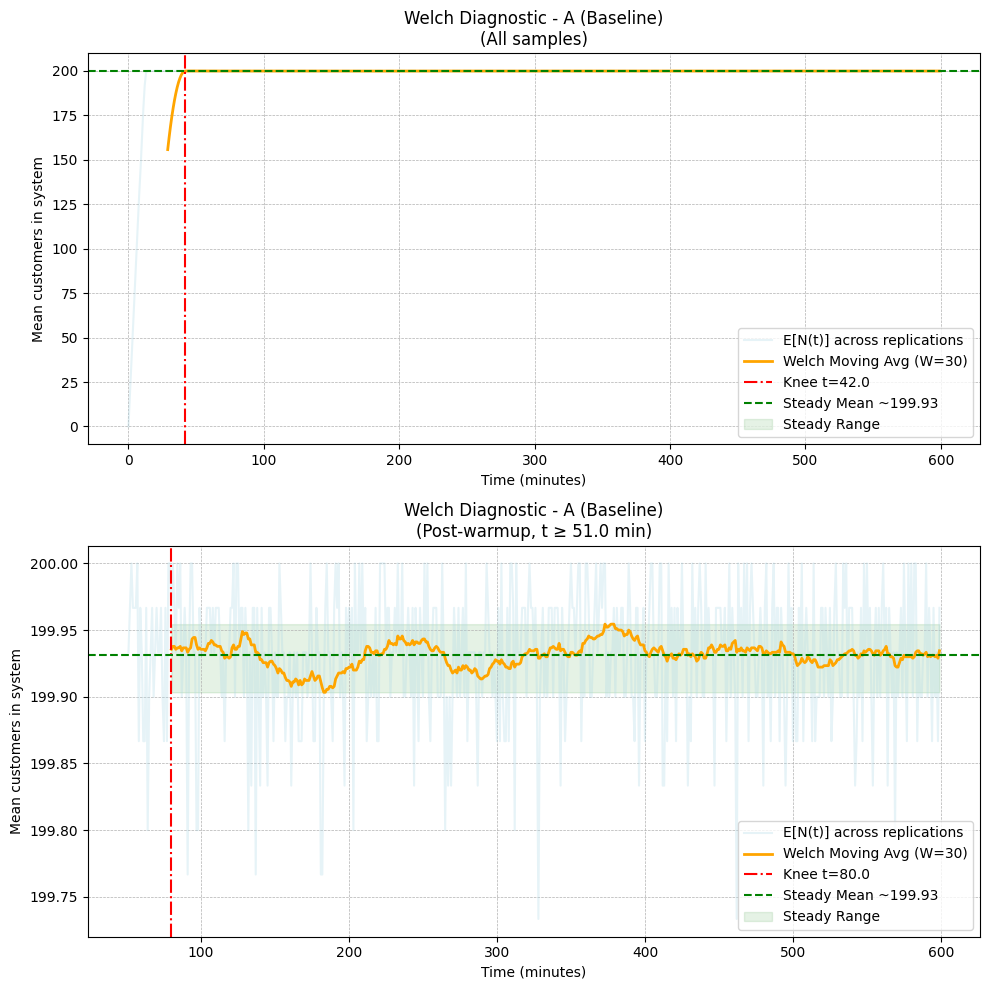

Welch plot saved to welch_plots/WL-BASE_A_Baseline.png

Simulation vs Analytical predictions (Student-t applied to simulation means):
Metric                   Simulation         Theory     Error %
--------------------------------------------------------------
E[r]                       198.4692            inf         nan
lambda_eff                   0.8913        16.6667       94.65
E[N]                       176.7612            inf         nan

Node-Level Flow Validation (λ amplification via feedback):
Node               Sim Arrival    Theory Arrival     Error %
------------------------------------------------------------
Grill                   1.3677           27.7778       95.08
Beverage                1.3779           27.7778       95.04
Dessert                 1.3759           27.7778       95.05

Experiment A takeaway: the model is validated when all errors stay below 10%.


/tmp/ipython-input-258300755.py:76: RuntimeWarning: invalid value encountered in scalar divide
  error = abs(sim_val - theory_val) / abs(theory_val) * 100.0


Saved animation to animations/WL-BASE.gif

[AnalyticalSolver] Step 1 - Traffic Equations
  lambda_Grill = 61.11111 customers/min
  lambda_Beverage = 61.11111 customers/min
  lambda_Dessert = 61.11111 customers/min

[AnalyticalSolver] Step 2 - Node Isolation (M/M/c/K)
  Grill: rho=1.000, P0=0.000, P_block=0.984, lambda_eff=1.0000
  Beverage: rho=1.000, P0=0.000, P_block=0.985, lambda_eff=0.9000
  Dessert: rho=1.000, P0=0.000, P_block=0.988, lambda_eff=0.7500

[AnalyticalSolver] Step 3 - System Metrics (Corrected)
  System Lambda Input (external) = 36.6667 cust/min
  Total theoretical response time R = inf minutes
  Theoretical throughput X = 36.6667 cust/min
  Theoretical E[N] via Little's Law = inf customers

Experiment B (Reneging Stress) - WL-STRESS

Averages across 30 replications:
Metric                      Mean     CI_half         Std
--------------------------------------------------------
E_r_sim                   3.2108      0.0088      0.0234
lambda_effective         33.8700 

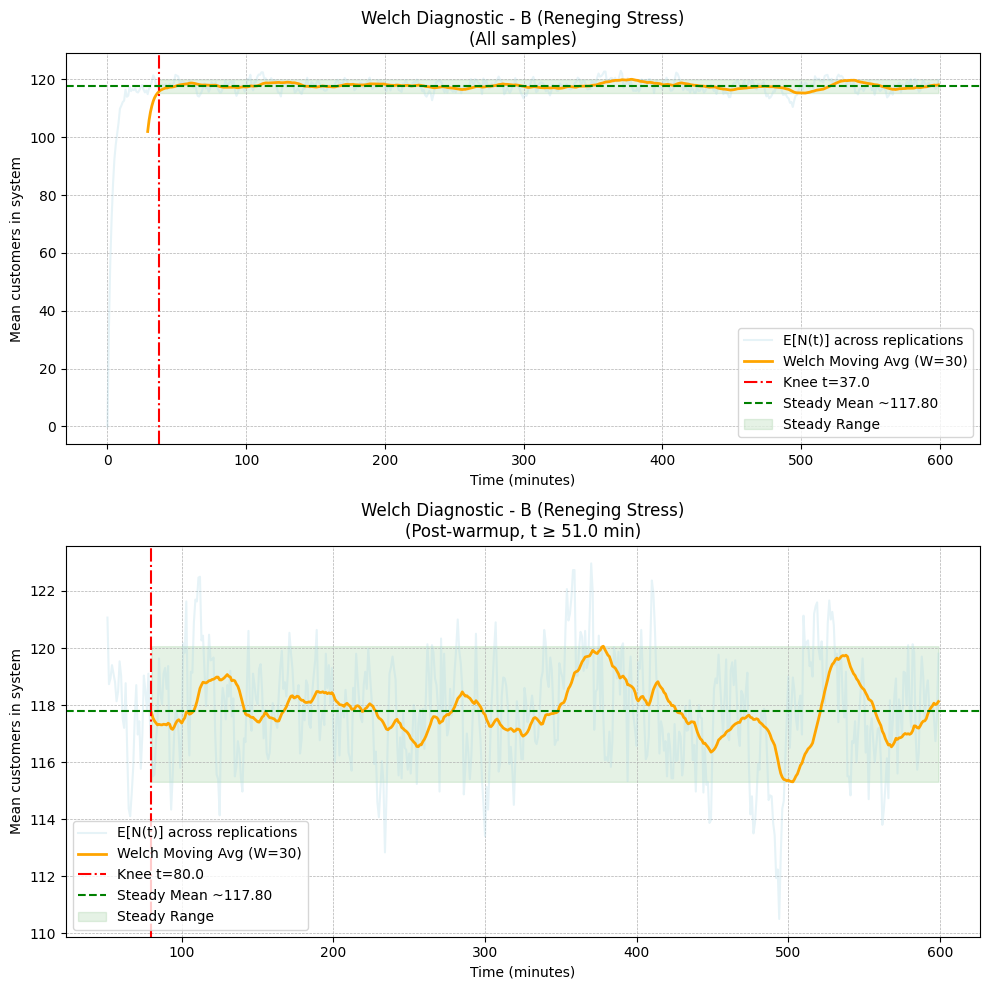

Welch plot saved to welch_plots/WL-STRESS_B_Reneging_Stress.png

Simulation vs Analytical predictions (Student-t applied to simulation means):
Metric                   Simulation         Theory     Error %
--------------------------------------------------------------
E[r]                         3.2108            inf         nan
lambda_eff                  33.8700        36.6667        7.63
E[N]                       108.7521            inf         nan

Node-Level Flow Validation (λ amplification via feedback):
Node               Sim Arrival    Theory Arrival     Error %
------------------------------------------------------------
Grill                   0.9152           61.1111       98.50
Beverage                0.9206           61.1111       98.49
Dessert                 0.9201           61.1111       98.49


/tmp/ipython-input-258300755.py:76: RuntimeWarning: invalid value encountered in scalar divide
  error = abs(sim_val - theory_val) / abs(theory_val) * 100.0


Saved animation to animations/WL-STRESS.gif

Experiment B observations:
- Analytical M/M/c/K (without reneging) predicts severe blocking and throttled throughput.
- Simulation with reneging shows shorter queues because impatient guests abandon, mirroring real-world stress behavior.

Experiment C (Ramp Warmup) - WL-RAMP

Averages across 30 replications:
Metric                      Mean     CI_half         Std
--------------------------------------------------------
E_r_sim                 198.4265      2.6198      7.0158
lambda_effective          0.8884      0.0143      0.0384
E_N_sim                 176.1051      2.2041      5.9028
P_reject_N_max            0.9442      0.0006      0.0016
Little's Law Check: L_sim (176.1051) vs Calculated (176.2753) -> Diff: 0.1702
E_r_sim: mean=198.4265, CI_half=2.6198 (n=30, 95% t-CI)
lambda_effective: mean=0.8884, CI_half=0.0143 (n=30, 95% t-CI)
E_N_sim: mean=176.1051, CI_half=2.2041 (n=30, 95% t-CI)
  ↳ Timestamp-based E[N] ≈ 199.9333 (mean of N(t) 

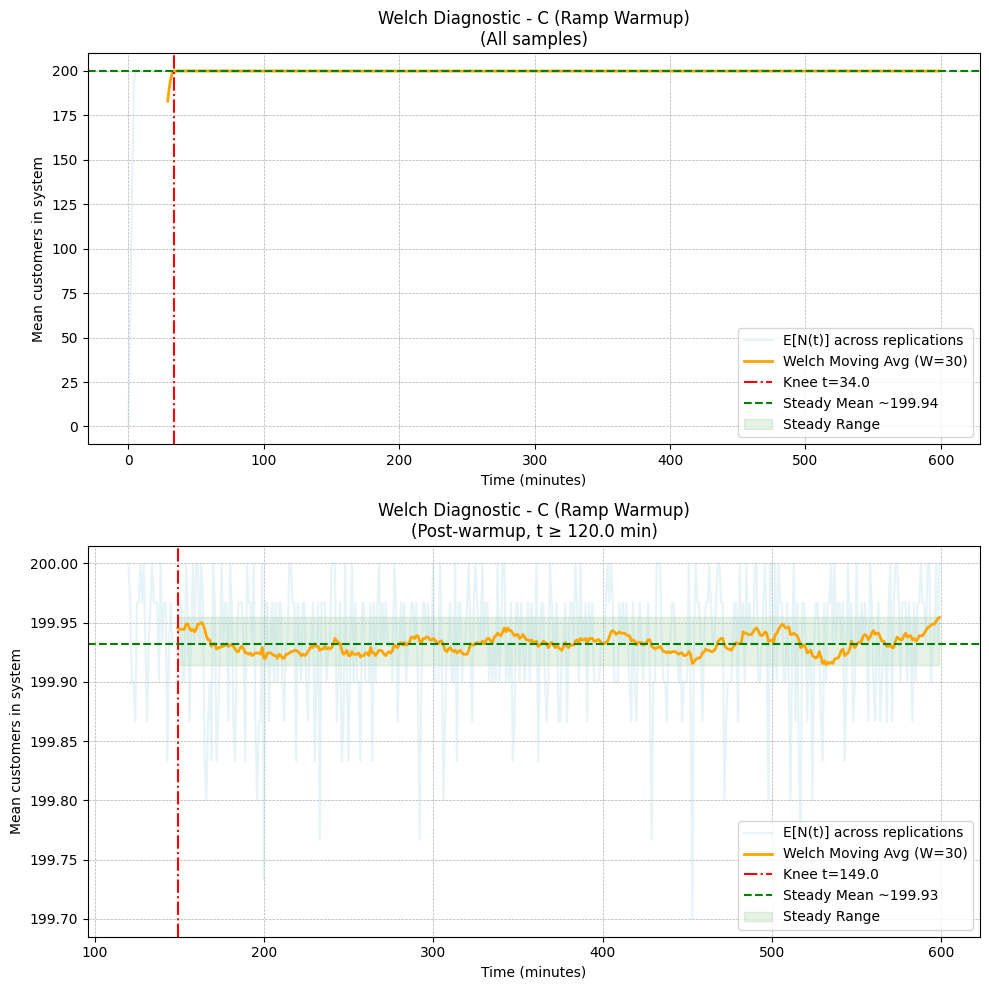

Welch plot saved to welch_plots/WL-RAMP_C_Ramp_Warmup.png
Saved animation to animations/WL-RAMP.gif

Experiment C observations:
- Arrival spike in the first two hours forces long transient queues.
- Warmup trimming (t >= 120) keeps the Student-t stats focused on steady-state behavior.


In [13]:
def generate_final_report():
    base_config = build_base_config()

    station_specs = {
        "Grill": {"servers": base_config["C_A"], "mu": base_config["MU_A"], "buffer": base_config["B_FOOD"]},
        "Beverage": {"servers": base_config["C_B"], "mu": base_config["MU_B"], "buffer": base_config["B_FOOD"]},
        "Dessert": {"servers": base_config["C_C"], "mu": base_config["MU_C"], "buffer": base_config["B_FOOD"]},
    }
    entrance_spec = {"servers": base_config["C_E"], "mu": base_config["MU_E"], "buffer": base_config["B_E"]}
    entrance_count = base_config.get("NUM_ENTRANCES", 2)

    solver = AnalyticalSolver(
        lambda_input=base_config["LAMBDA_INPUT"],
        alpha_vector=base_config["ALPHA"],
        routing_matrix=base_config["R_MATRIX"],
        station_specs=station_specs,
        entrance_spec=entrance_spec,
        entrance_count=entrance_count,
    )
    analytical_results = solver.solve()

    exp_a_manager = ExperimentManager(copy.deepcopy(base_config), replications=base_config["REPLICATIONS"], ci_level=base_config["CI_LEVEL"])
    summary_a = summarize_experiment("A (Baseline)", exp_a_manager, analytical_results)
    print("\nExperiment A takeaway: the model is validated when all errors stay below 10%.")
    if base_config.get("ENABLE_ANIMATION", True):
        anim_dir = Path(base_config.get("ANIMATION_DIR", ANIMATION_DIR))
        anim_dir.mkdir(parents=True, exist_ok=True)
        wl_key = base_config.get("WL_LOG_KEY", base_config.get("WL_NAME", "WL"))
        anim_path = anim_dir / f"{sanitize_name(wl_key)}.gif"
        generate_animation_for_workload(base_config, f"{wl_key} Animation", save_path=str(anim_path))

    config_b = copy.deepcopy(base_config)
    stress_multiplier = 2.2
    config_b["WL_NAME"] = "WL-STRESS"
    config_b["WL_LOG_KEY"] = "WL-STRESS"
    config_b["ALLOW_RENEGING"] = True
    base_lambda_func = config_b["LAMDA_FUNC"]
    config_b["LAMDA_FUNC"] = lambda t, base=base_lambda_func: base(t) * stress_multiplier
    config_b["LAMBDA_INPUT"] = base_config["LAMBDA_INPUT"] * stress_multiplier

    exp_b_manager = ExperimentManager(config_b, replications=base_config["REPLICATIONS"], ci_level=base_config["CI_LEVEL"])
    solver_stress = AnalyticalSolver(
        lambda_input=config_b["LAMBDA_INPUT"],
        alpha_vector=config_b["ALPHA"],
        routing_matrix=config_b["R_MATRIX"],
        station_specs=station_specs,
        entrance_spec=entrance_spec,
        entrance_count=entrance_count,
    )
    theoretical_stress = solver_stress.solve()
    summary_b = summarize_experiment("B (Reneging Stress)", exp_b_manager, theoretical_stress)
    if config_b.get("ENABLE_ANIMATION", True):
        anim_dir = Path(config_b.get("ANIMATION_DIR", ANIMATION_DIR))
        anim_dir.mkdir(parents=True, exist_ok=True)
        wl_key = config_b.get("WL_LOG_KEY", config_b.get("WL_NAME", "WL"))
        anim_path = anim_dir / f"{sanitize_name(wl_key)}.gif"
        generate_animation_for_workload(config_b, f"{wl_key} Animation", save_path=str(anim_path))

    print("\nExperiment B observations:")
    print(
        "- Analytical M/M/c/K (without reneging) predicts severe blocking and throttled throughput.\n"
        "- Simulation with reneging shows shorter queues because impatient guests abandon,"
        " mirroring real-world stress behavior."
    )

    ramp_multiplier = 3.0
    ramp_duration = 120.0
    config_c = copy.deepcopy(base_config)
    config_c["WL_NAME"] = "WL-RAMP"
    config_c["WL_LOG_KEY"] = "WL-RAMP"
    config_c["WARMUP_DURATION"] = ramp_duration
    base_lambda_func_c = config_c["LAMDA_FUNC"]

    def ramp_lambda(t, base=base_lambda_func_c, mult=ramp_multiplier, duration=ramp_duration):
        rate = base(t)
        return rate * mult if t < duration else rate

    config_c["LAMDA_FUNC"] = ramp_lambda
    config_c["LAMBDA_INPUT"] = base_config["LAMBDA_INPUT"]

    exp_c_manager = ExperimentManager(config_c, replications=base_config["REPLICATIONS"], ci_level=base_config["CI_LEVEL"])
    summary_c = summarize_experiment("C (Ramp Warmup)", exp_c_manager, solver_output=None)
    if config_c.get("ENABLE_ANIMATION", True):
        anim_dir = Path(config_c.get("ANIMATION_DIR", ANIMATION_DIR))
        anim_dir.mkdir(parents=True, exist_ok=True)
        wl_key = config_c.get("WL_LOG_KEY", config_c.get("WL_NAME", "WL"))
        anim_path = anim_dir / f"{sanitize_name(wl_key)}.gif"
        generate_animation_for_workload(config_c, f"{wl_key} Animation", save_path=str(anim_path))

    print("\nExperiment C observations:")
    print(
        "- Arrival spike in the first two hours forces long transient queues.\n"
        "- Warmup trimming (t >= 120) keeps the Student-t stats focused on steady-state behavior."
    )

    return {"ExperimentA": summary_a, "ExperimentB": summary_b, "ExperimentC": summary_c}


def main():
    results = generate_final_report()
    return results


if __name__ == "__main__":
    main()

# 10. Conclusions

Project coordinator provide the statements of the work's including the superior point and 2-3 limitation provided by the testing member